# CZI Human : Dimensionality Reduction and Clustering with SIMLR

In [1]:
library('SIMLR')
library(Rcpp)
library(Matrix)
library(pracma)
library(RcppAnnoy)
library(RSpectra)
library('Rtsne')
# load the igraph package to compute the NMI
library(igraph)

# load the palettes for the plots
library(grDevices)

# load the SIMLR R package
source("SIMLR/R/SIMLR_Large_Scale.R")
source("SIMLR/R/utils.simlr.large.scale.R")
source("SIMLR/R/utils.simlr.R")
source("SIMLR/R/SIMLR.Rtsne.R")

# load the C file

# NOTE 1: we make use of an external C program during the computations of SIMLR.
# The code is located in the R directory in the file projsplx_R.c. In order to 
# use SIMLR one needs to compite the program. To do so, one needs to run on the 
# shell the command R CMD SHLIB -c projsplx_R.c. 
# The precompiled projsplx_R.so is already provided for MAC OS X only. 
# If one wants to use SIMLR on other operative systems, the file projsplx_R.so 
# needs to be deleted, and re-compiled. 

# NOTE 2: for Windows, the command dyn.load("./R/projsplx_R.so") needs to be 
# substituted with the command dyn.load("./R/projsplx_R.dll"). 

dyn.load("SIMLR/R/projsplx_R.so")

sourceCpp("SIMLR/src/Rtsne.cpp")




Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



### Input

In [2]:
if(FALSE) {
# X = as.matrix(read.csv("FILENAME", row.names = 1, header= TRUE , sep='\t'))
exon_matrix = as.matrix(read.csv("./human_MTG/exons-table.csv", row.names = 1, header= TRUE , sep=',' ))
intron_matrix = as.matrix(read.csv("./human_MTG/introns-table.csv", row.names = 1, header= TRUE , sep=',' ))

human_matrix = exon_matrix+intron_matrix

#mouse_counts = mouse_matrix[,c(1:20)]
human_counts = human_matrix

human_norm = sweep(human_counts,2,colSums(human_counts),`/`)

human_tpm = 1e6*human_norm
human_log = log2(human_tpm+1)

human_matrix = human_log

human_matrix <- human_matrix[,colSums(human_matrix != 0) != 0]

saveRDS(human_matrix , file = "human_matrix.Rdata")
#readRDS("results/edv_simlr_clustering_v2018-001-224952.Rdata")
}


human_matrix = readRDS(file = "human_matrix.Rdata")

### Select Autosomal Genes 
Since there are both male and female donors

In [3]:
human_genes = (read.csv("./human_MTG/rows-genes.csv", row.names = NULL, header= TRUE , sep=',' ))

In [4]:
autosomal_genes_1 = human_genes[!(human_genes$chromosome=='X' | human_genes$chromosome=='Y'),]
autosomal_genes_2=autosomal_genes_1[,c(1)]

human_matrix_autosomal = human_matrix[autosomal_genes_2,]
autosomal_genes = (as.list(row.names(human_matrix_autosomal)))

In [5]:
mitochondrial_genes = as.list(read.csv("./human_MTG/mito_genes.txt" , row.names = NULL, header= FALSE , sep='\t'))
mitochondrial_genes = (mitochondrial_genes$V1)
mitochondrial_genes = as.list(levels(mitochondrial_genes))
final_list = as.factor(unlist(setdiff(autosomal_genes , mitochondrial_genes )))
human_matrix_final = (human_matrix_autosomal[final_list,])

In [6]:
saveRDS(human_matrix_final , file = "human_matrix_final.Rdata")

### Dimensionality reduction and clustering


In [14]:
n_clust = 36 
set.seed(11111)
cat("Performing analysis for the Human dataset","\n")
res_large_scale = SIMLR_Large_Scale(X=human_matrix_final,c=n_clust,k=50,kk=400)





path <- "results/human/edv_simlr_clustering_v" 
time <- format(Sys.time(), format = "%Y-%j-%H%M%S") 


saveRDS(res_large_scale , file = paste0(path, time , ".RData"))

pdf(file=paste0(path, time , ".pdf")) 
# make the scatterd plots
plot(res_large_scale$ydata,col=c(colors(n_clust))[res_large_scale$y$cluster],xlab="SIMLR component 1", ylab="SIMLR component 2",pch=20,main="SIMILR 2D visualization for Zelsel")
dev.off() 

#readRDS("results/edv_simlr_clustering_v2018-001-224952.Rdata")

Performing analysis for the Mouse dataset 
Performing fast PCA.
Performing k-nearest neighbour search.
Computing the multiple Kernels.
Performing the iterative procedure  10  times.
Iteration:  1 
Iteration:  2 
Iteration:  3 
Iteration:  4 
Iteration:  5 
Iteration:  6 
Iteration:  7 
Iteration:  8 
Iteration:  9 
Iteration:  10 
Performing Kmeans.
Performing t-SNE.
The main loop will be now performed with a maximum of 300 iterations.
Performing iteration 1.
Performing iteration 2.
Performing iteration 3.
Performing iteration 4.
Performing iteration 5.
Performing iteration 6.
Performing iteration 7.
Performing iteration 8.
Performing iteration 9.
Performing iteration 10.
Performing iteration 11.
Performing iteration 12.
Performing iteration 13.
Performing iteration 14.
Performing iteration 15.
Performing iteration 16.
Performing iteration 17.
Performing iteration 18.
Performing iteration 19.
Performing iteration 20.
Performing iteration 21.
Performing iteration 22.
Performing iteratio

png 
  2

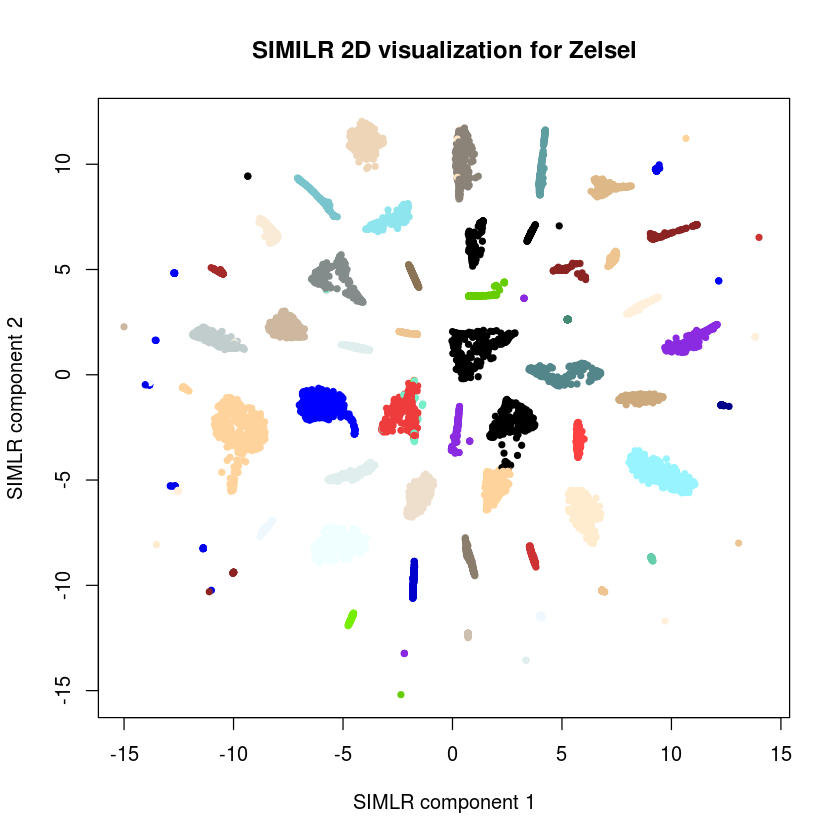

In [9]:
 plot(results$ydata,col=c(colors(dim(results$F)[2]))[results$y$cluster],xlab="SIMLR component 1", ylab="SIMLR component 2",pch=20,main="SIMILR 2D visualization for Zelsel")


### Looking for 140 clusters 
Since that is the number in the cl.csv example file

In [6]:
results=readRDS("results/human/edv_simlr_clustering_n42_v2018-009-102720.RData")

In [141]:
results$y = kmeans(results$F,45,nstart=200)


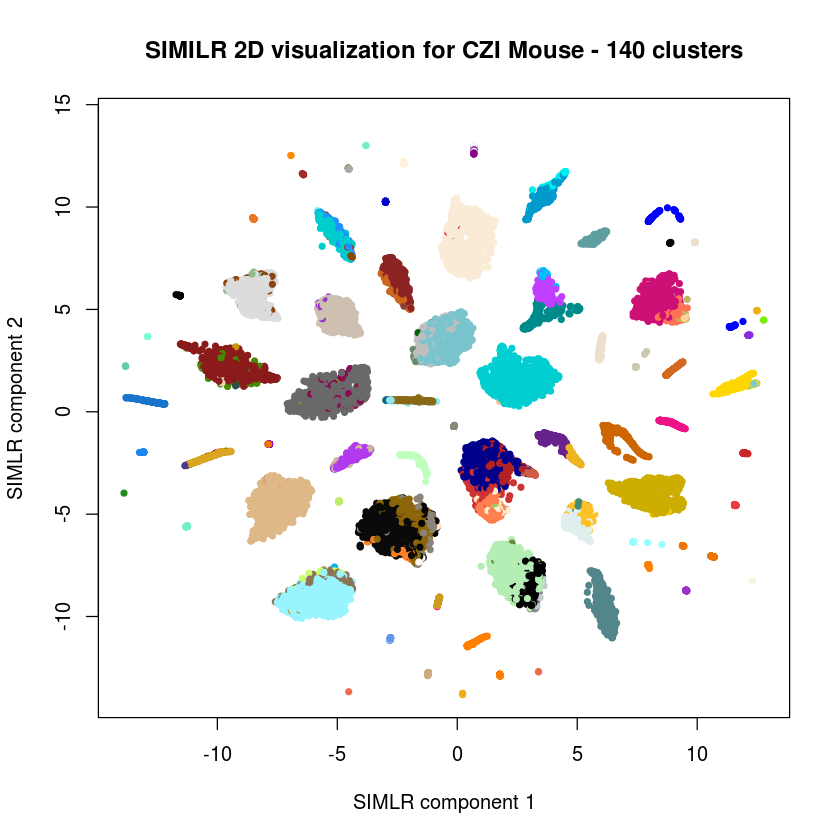

In [144]:
plot(results$ydata,col=c(colors(140))[results$y$cluster],xlab="SIMLR component 1", ylab="SIMLR component 2",pch=20,main="SIMILR 2D visualization for CZI Mouse - 140 clusters")

### Louvain Clustering

In [103]:
names(results)

class(results$y$cluster)


[1] "y"              "S0"             "F"              "ydata"         
[5] "alphaK"         "val"            "ind"            "execution.time"

[1] "integer"

In [2]:
library(Seurat)

Loading required package: ggplot2
Loading required package: cowplot

Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave



In [4]:
human_matrix = readRDS(file = "human_matrix.Rdata")
czi_human_simlr <- CreateSeuratObject(raw.data = human_matrix,  project = "CZI")


In [8]:
simlr_embeddings = results$F
str(simlr_embeddings)
row.names(simlr_embeddings) = colnames(human_matrix)
colnames(x = simlr_embeddings) <- paste0("SIMLR", 1:dim(simlr_embeddings)[2])


czi_human_simlr <- SetDimReduction(object = czi_human_simlr, reduction.type = "simlr", slot = "cell.embeddings", 
    new.data = simlr_embeddings)
czi_human_simlr <- SetDimReduction(object = czi_human_simlr, reduction.type = "simlr", slot = "key", 
    new.data = "SIMLR")
czi_human_simlr <- FindClusters(czi_human_simlr, reduction.type = "simlr", dims.use = 1:45, save.SNN = T)

 num [1:15928, 1:45] 3.32e-16 -3.65e-16 7.44e-16 3.69e-16 -3.42e-09 ...
[1] "Constructing SNN"
  |======================================================================| 100%


In [9]:
str(czi_human_simlr)

Formal class 'seurat' [package "Seurat"] with 20 slots
  ..@ raw.data    : num [1:50281, 1:15928] 0 0 0 0 0 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:50281] "3.8-1.2" "3.8-1.3" "3.8-1.4" "3.8-1.5" ...
  .. .. ..$ : chr [1:15928] "LS.15005h_S01_E1.50" "LS.15005h_S02_E1.50" "LS.15005h_S03_E1.50" "LS.15005h_S04_E1.50" ...
  ..@ data        : num [1:50281, 1:15928] 0 0 0 0 0 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:50281] "3.8-1.2" "3.8-1.3" "3.8-1.4" "3.8-1.5" ...
  .. .. ..$ : chr [1:15928] "LS.15005h_S01_E1.50" "LS.15005h_S02_E1.50" "LS.15005h_S03_E1.50" "LS.15005h_S04_E1.50" ...
  ..@ scale.data  : NULL
  ..@ var.genes   : logi(0) 
  ..@ is.expr     : num 0
  ..@ ident       : Factor w/ 59 levels "0","1","2","3",..: 4 7 27 9 35 9 13 47 24 2 ...
  .. ..- attr(*, "names")= chr [1:15928] "LS.15005h_S01_E1.50" "LS.15005h_S02_E1.50" "LS.15005h_S03_E1.50" "LS.15005h_S04_E1.50" ...
  ..@ meta.data   :'data.frame':	15928 obs. of  4 variables:
  .. .

In [104]:
(czi_mouse_simlr@ident)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


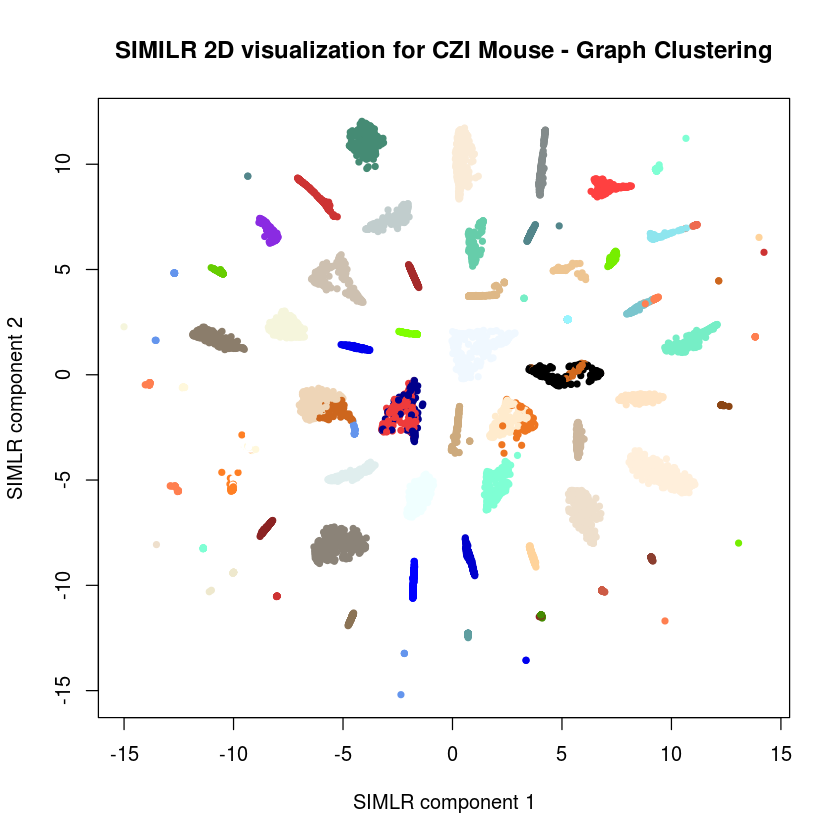

In [11]:
plot(results$ydata,col=c(colors(59))[czi_human_simlr@ident],xlab="SIMLR component 1", ylab="SIMLR component 2",pch=20,main="SIMILR 2D visualization for CZI Mouse - Graph Clustering")